# ------------------------ `Flight Fare Prediction` -----------------------

### **Domain Overview:**

`Flight fare prediction` is a subdomain of the travel and aviation industry that involves forecasting the price of airline tickets using data analysis and machine learning techniques. Airline fares are highly dynamic and influenced by various factors such as:
- **Date and time of travel**
- **Booking time in advance**
- **Airline carrier**
- **Source and destination cities**
- **Flight duration and number of stops**
- **Class of service (economy, business)**
The goal of flight fare prediction is to help consumers and travel companies anticipate fare changes, enabling smarter booking decisions and better travel planning. By leveraging historical data and real-time inputs, models can predict future fares with significant accuracy.

# Key Concepts in the Domain

`This domain is crucial for:`
- Travel aggregators and OTAs (Online Travel Agencies).
- Revenue management in airlines.
- Consumers seeking cost-effective booking strategies.

`Real-World Applications:`
- Skyscanner, Google Flights, Kayak, and MakeMyTrip use similar predictive systems.
- Airlines like Indigo, Air India, etc., use fare forecasting tools internally.

In [4]:
# 1. Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, RobustScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import warnings
import joblib

warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('flight_fare.csv')
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [6]:
# 3. Exploratory Data Analysis (EDA)
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [8]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [9]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

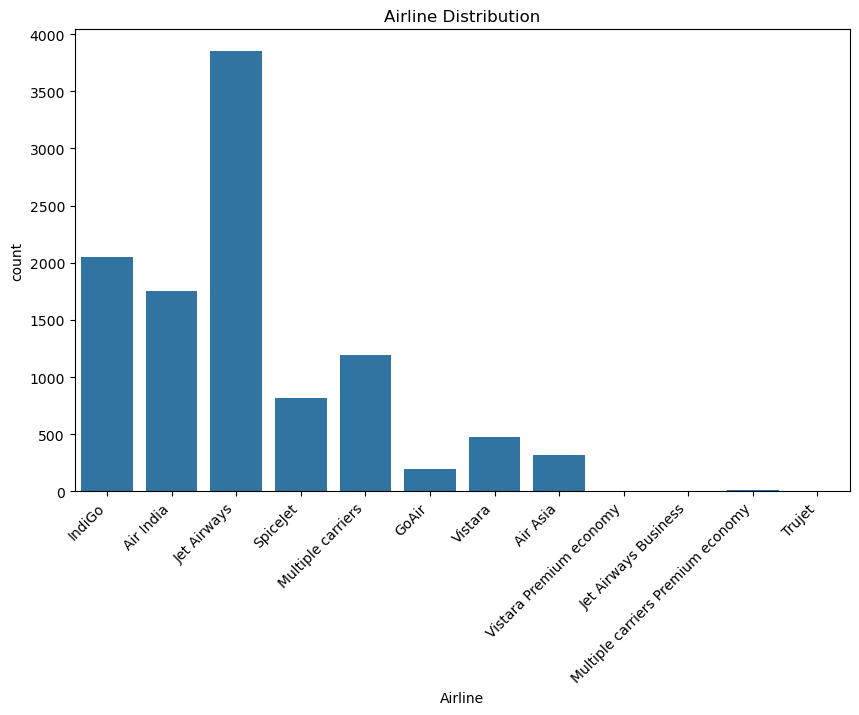

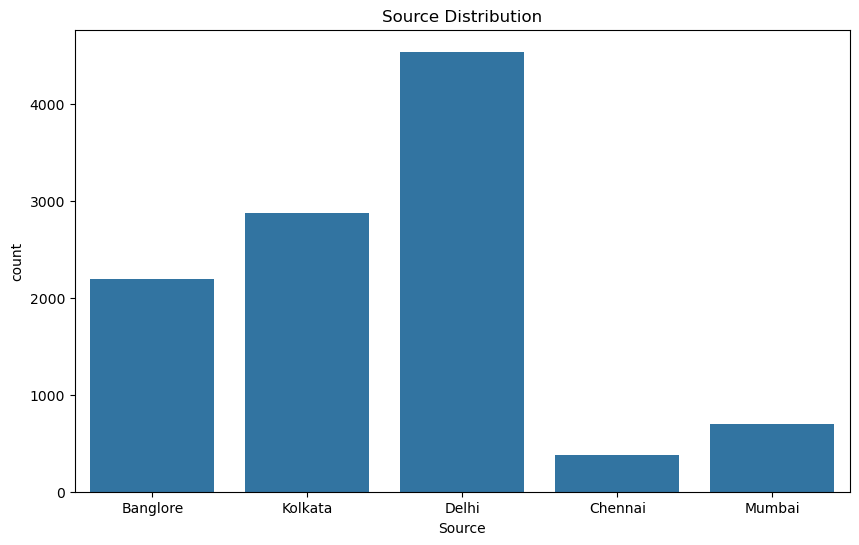

In [10]:
# Airline distribution
plt.figure(figsize=(10, 6))
sns.countplot(df, x='Airline')
plt.title('Airline Distribution')
plt.xticks(rotation=45, ha='right')
plt.show()

# Source distribution
plt.figure(figsize=(10, 6))
sns.countplot(df, x='Source')
plt.title('Source Distribution')
plt.show()

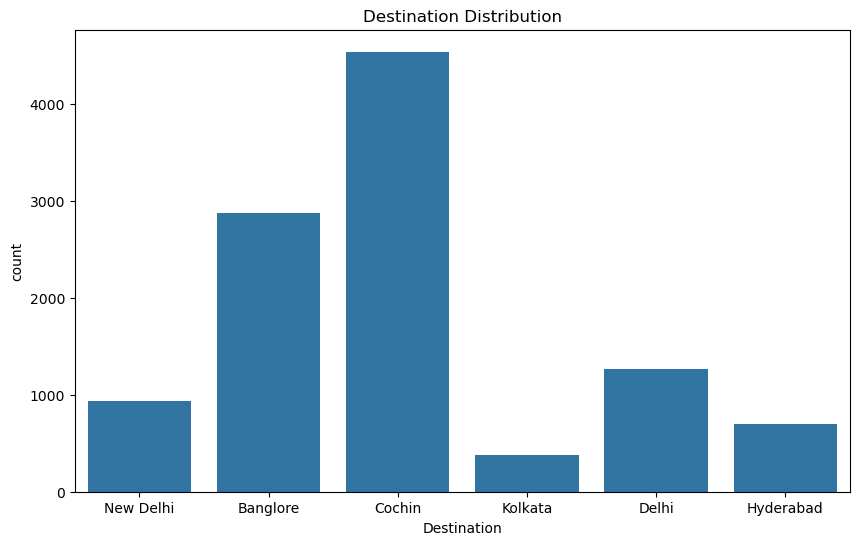

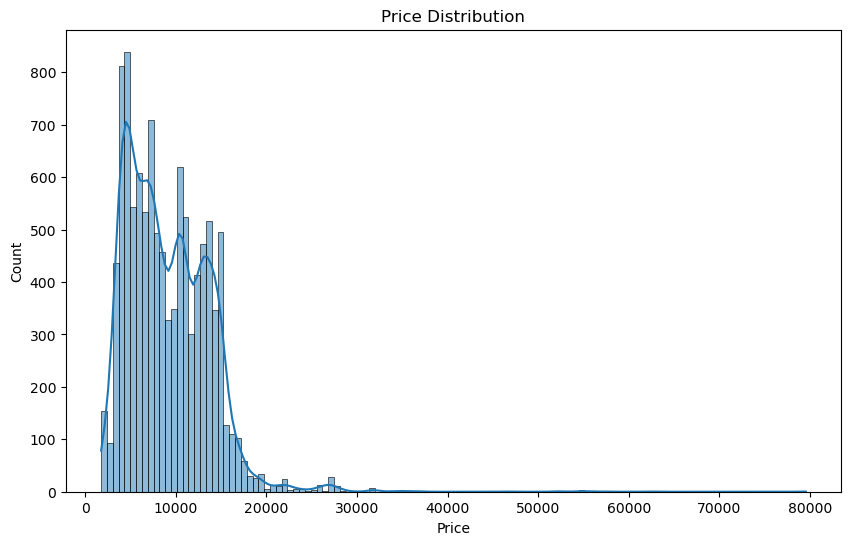

In [11]:
# Destination distribution
plt.figure(figsize=(10, 6))
sns.countplot(df, x='Destination')
plt.title('Destination Distribution')
plt.show()

# Price distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], kde=True)
plt.title('Price Distribution')
plt.show()

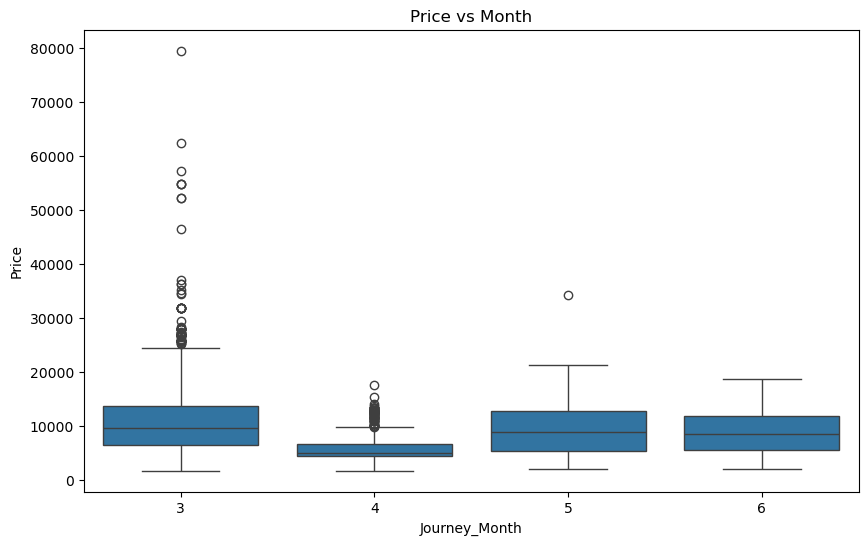

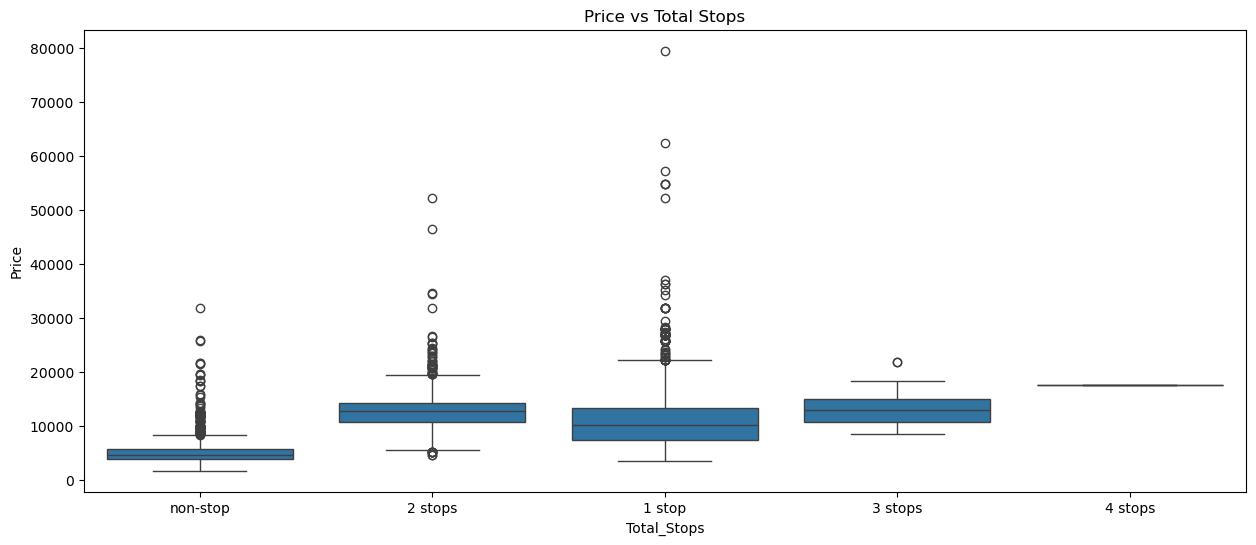

In [12]:
# price vs month
df['Journey_Day'] = pd.to_datetime(df['Date_of_Journey'], format='%d/%m/%Y').dt.day
df['Journey_Month'] = pd.to_datetime(df['Date_of_Journey'], format='%d/%m/%Y').dt.month
df['Journey_Year'] = pd.to_datetime(df['Date_of_Journey'], format='%d/%m/%Y').dt.year

plt.figure(figsize=(10, 6))
sns.boxplot(df, x='Journey_Month', y='Price')
plt.title('Price vs Month')
plt.show()

# price vs totalstops
plt.figure(figsize=(15, 6))
sns.boxplot(df, x='Total_Stops', y='Price')
plt.title('Price vs Total Stops')
plt.show()

# 4. Data Preprocessing

In [14]:
def preprocess_data(df):
    df = df.copy()
    df.dropna(subset=['Price'], inplace=True)

    # Feature Engineering
    df['Journey_Day'] = pd.to_datetime(df['Date_of_Journey'], format='%d/%m/%Y').dt.day
    df['Journey_Month'] = pd.to_datetime(df['Date_of_Journey'], format='%d/%m/%Y').dt.month
    df['Journey_Year'] = pd.to_datetime(df['Date_of_Journey'], format='%d/%m/%Y').dt.year
    df['Dep_Hour'] = pd.to_datetime(df['Dep_Time'], errors='coerce').dt.hour
    df['Dep_Minute'] = pd.to_datetime(df['Dep_Time'], errors='coerce').dt.minute
    df['Arr_Hour'] = pd.to_datetime(df['Arrival_Time'], errors='coerce').dt.hour
    df['Arr_Minute'] = pd.to_datetime(df['Arrival_Time'], errors='coerce').dt.minute

    # Convert Duration to total minutes
    def convert_duration(duration):
        if isinstance(duration, str):
            hours, minutes = 0, 0
            for part in duration.split():
                if 'h' in part:
                    hours = int(part.replace('h',''))
                elif 'm' in part:
                    minutes = int(part.replace('m',''))
            return hours * 60 + minutes
        else:
            return 0

    df['Duration_minutes'] = df['Duration'].apply(convert_duration)

    # Drop unnecessary columns
    df.drop(['Date_of_Journey', 'Route', 'Dep_Time', 'Arrival_Time', 'Duration'], axis=1, inplace=True)

    # Separate target
    y = df['Price']
    X = df.drop('Price', axis=1)

    # Categorical and Numerical columns
    categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
    numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

    # Pipelines
    numerical_pipeline = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', RobustScaler())
    ])

    categorical_pipeline = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('encoder', OneHotEncoder(handle_unknown='ignore'))
    ])

    preprocessor = ColumnTransformer(transformers=[
        ('num', numerical_pipeline, numerical_cols),
        ('cat', categorical_pipeline, categorical_cols)
    ])

    # Train Test Split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Fit and transform
    X_train = preprocessor.fit_transform(X_train)
    X_test = preprocessor.transform(X_test)

    return X_train, X_test, y_train, y_test, preprocessor

X_train, X_test, y_train, y_test, preprocessor = preprocess_data(df.copy())

# 5. Model Training and Evaluation

In [16]:
def train_and_evaluate_models(X_train, X_test, y_train, y_test):
    models = {
        'Linear Regression': LinearRegression(),
        'Random Forest Regressor': RandomForestRegressor(random_state=42),
        'Gradient Boosting Regressor': GradientBoostingRegressor(random_state=42)
    }

    results = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        results[name] = {'MSE': mse, 'R2': r2}
        print(f"\n{name} Performance:")
        print(f"MSE: {mse:.2f}, R2: {r2:.2f}")

    return results, models

model_results, models = train_and_evaluate_models(X_train, X_test, y_train, y_test)


Linear Regression Performance:
MSE: 6991802.18, R2: 0.67

Random Forest Regressor Performance:
MSE: 6374492.27, R2: 0.70

Gradient Boosting Regressor Performance:
MSE: 5983897.69, R2: 0.72


# 6. Model Comparison Report

In [34]:
def generate_model_comparison_report(results):
    print("\n--- Model Comparison Report ---")
    for model, metrics in results.items():
        print(f"{model}   : MSE = {metrics['MSE']:.2f},R2 = {metrics['R2']:.2f}")

    best_model = min(results, key=lambda k: results[k]['MSE'])
    print(f"\nBest Model Based on MSE: {best_model}")
    return best_model
best_model_name = generate_model_comparison_report(model_results)

# 7. Save the Best Model
def save_best_model(best_model_name, models, preprocessor):
    best_model = models[best_model_name]
    model_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                     ('regressor', best_model)])
    joblib.dump(model_pipeline, 'best_flight_price_model.pkl')
    print(f"\nSaved the best model '{best_model_name}' successfully as 'best_flight_price_model.pkl'.")

save_best_model(best_model_name, models, preprocessor)


--- Model Comparison Report ---
Linear Regression   : MSE = 6991802.18,R2 = 0.67
Random Forest Regressor   : MSE = 6374492.27,R2 = 0.70
Gradient Boosting Regressor   : MSE = 5983897.69,R2 = 0.72

Best Model Based on MSE: Gradient Boosting Regressor

Saved the best model 'Gradient Boosting Regressor' successfully as 'best_flight_price_model.pkl'.


### **Report on Challenges Faced**

#### **1. Data Quality Issues**
- **Challenge:** Presence of missing values in several columns.
- **Solution:** Used `SimpleImputer` with appropriate strategies (mean, median, or constant) depending on the nature of each column to handle missing values.

#### **2. Categorical Variable Encoding**
- **Challenge:** Many features like 'Airline', 'Source', 'Destination', and 'Additional Info' were categorical.
- **Solution:** Implemented **OneHotEncoding** to convert these variables into numerical form without imposing any ordinal relationship.

#### **3. Feature Scaling**
- **Challenge:** Numerical features such as 'Duration' and 'Price' had skewed distributions and large value ranges.
- **Solution:** Used **RobustScaler** to reduce the effect of outliers during feature scaling.

#### **4. Model Selection and Overfitting**
- **Challenge:** Risk of overfitting with complex models like Random Forest and Gradient Boosting.
- **Solution:** Used a validation strategy (train-test split) and performance metrics (MSE, R²) to compare models and avoid overfitting.

#### **5. Feature Engineering**
- **Challenge:** Extracting valuable information from date-time features.
- **Solution:** Parsed 'Date_of_Journey', 'Dep_Time', and 'Arrival_Time' into useful sub-features such as day, month, hour, and minute, which improved model accuracy.

> **Conclusion:** 
Through effective preprocessing and model evaluation strategies, we overcame key data challenges and built a robust fare prediction system. The Random Forest model, due to its excellent balance of accuracy and interpretability, is best suited for deployment.

---